In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
 

In [49]:
# now read the data into pandas
df = pd.read_csv(r'input/regression.csv')

In [50]:
X = df.x
y = df.y

In [44]:
X = sm.add_constant(X)

In [45]:
lr_model = sm.OLS(y,X).fit()

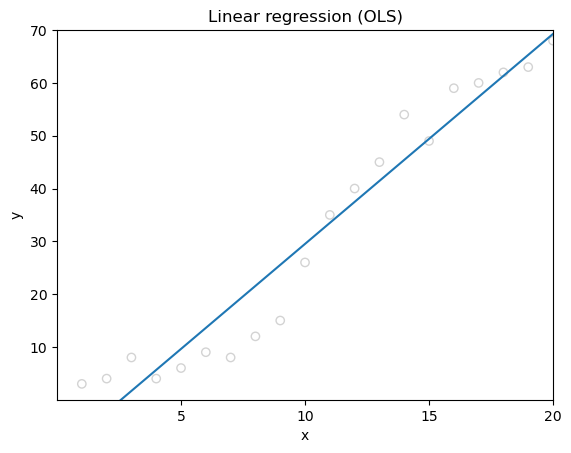

In [46]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression (OLS)')

# define lists of x- and y-axis ticks
xt = np.arange(0, df.x.max() + 5 ,5 )
yt = np.arange(0, df.y.max() + 10 ,10)

plt.axis([xt[0], xt[-1], yt[0], yt[-1]])
plt.xticks(xt[1:])
plt.yticks(yt[1:])

plt.scatter(df.x, df.y, facecolors = 'none', edgecolors='lightgray')
x_prime = [xt[0], xt[-1]]

x_prime = sm.add_constant(x_prime)
y_hat = lr_model.predict(x_prime)
plt.plot(x_prime[:,1], y_hat)

In [57]:
# now use gradient descent
def batch_gradient_descent(y, X, alpha, epsilon, plot_on=-1, plot_func=None):
    # Initialize our 'guess' for each coefficient
    # theta_j to 1 and store these in a single column
    theta = np.ones(shape=(X.shape[1], 1))
    
    m = X.shape[0] # number of data points
    
    # Calculate a column of predicted y-values for each data point
    y_hat = X @ theta 
    
    cost = np.transpose(y_hat - y ) @ (y_hat - y)
    
    costs = [cost[0][0] / ( 2 * m)]
    
    i = 0 
    delta = 1
    
   
    while (delta > epsilon):
        if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
            plot_func(theta)
        
        differences = X @ theta - y 
        theta = theta - (alpha / m ) * ((np.transpose(X)) @ differences)
        cost = np.transpose( X @ theta - y ) @ ( X @ theta - y)
        costs.append(cost[0][0] / (2 * m))
        delta = abs(costs[i+1] - costs[i])
        
        if (costs[i+1] > costs[i]):
            print("Cost is increasing. Try reducing alpha.")
            break
            
        i += 1 
    if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
        plot_func(theta)
            
    print('Completed in' , i , 'iterations.')
    return theta
    

In [58]:
X = df[['x']]
y = df[['y']]

Completed in 10 iterations.


array([[3.22594069]])

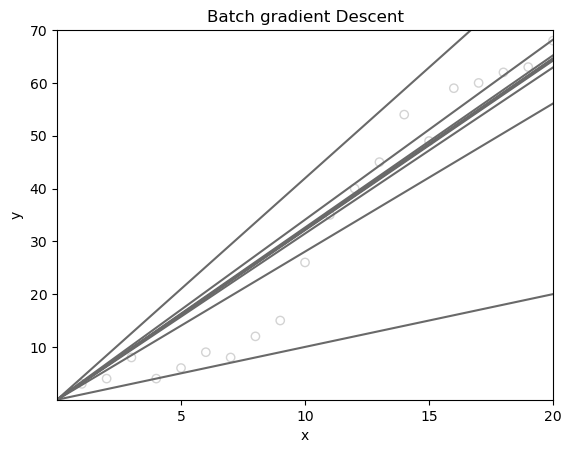

In [59]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Batch gradient Descent')

# define lists of x- and y-axis ticks
xt = np.arange(0, df.x.max() + 5 ,5 )
yt = np.arange(0, df.y.max() + 10 ,10)

plt.axis([xt[0], xt[-1], yt[0], yt[-1]])
plt.xticks(xt[1:])
plt.yticks(yt[1:])

plt.scatter(df.x, df.y, facecolors = 'none', edgecolors='lightgray')
x_prime = [xt[0], xt[-1]]

def plot_model(theta):
    y_hat = [xp * theta[0] for xp in x_prime]
    plt.plot(x_prime, y_hat, color = 'dimgrey')
    
X = X.to_numpy()
y = y.to_numpy()

# call the function for computing the gradient descent:
batch_gradient_descent(y = y, X = X, alpha = 0.01, epsilon=10**-4, plot_on=1, plot_func=plot_model)